# Згин складеної (багатошарової) балки

Балка, склеєна з трьох ортотропних смуг різної товщини і однакової ширини та з різними пружними властивостями;<br>
один кінець її жорстко замурований, а на іншому діє навантаження, що призводить до моменту M = 25 кНм і поперечної сили P = 10 кН (рис.1).<br>
Потрібно визначити напруження в кожному шарі, а також рівняння зігнутої вісі і жорсткість згину, та побудувати епюри напружень.

<img src="1.png" width="600">
<em>Рис.1 Тришарова балка</em>

## Частина 1 Аналітичний метод

Імпортуємо необхідні для розрахунку бібліотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Вихідні дані:**

In [2]:
b = [0, 100, 350, 550]
E_1 = [14000, 14000, 28000, 42000]
h = 45
M = 25000 * 10**3
P = 10000
l = 1650
x_coord = 1000

Для подальшого розрахунку  спочатку розрахуємо параматри жорсткості

In [3]:
S_1_list = []
S_2_list = []
S_3_list = []

for i in range(0, 3):
    S_1_list.append((b[i + 1] - b[i]) * E_1[i + 1])
    S_2_list.append(((b[i + 1])**2 - (b[i])**2) * E_1[i + 1])
    S_3_list.append(((b[i + 1])**3 - (b[i])**3) * E_1[i + 1])
    
S_1 = sum(S_1_list)
S_2 = sum(S_2_list)
S_3 = sum(S_3_list)
S = 4 * S_1 * S_3 - 3 * S_2**2

pd.DataFrame([[S_1, S_2, S_3, S]], columns = ["S_1 [MPa*mm]", "S_2 [MPa*mm^2]", "S_3 [MPa*mm^3]", "S [MPa*mm^4]"])

,S_1 [MPa*mm],S_2 [MPa*mm^2],S_3 [MPa*mm^3],S [MPa*mm^4]
0,16800000,10850000000,6373500000000,75131700000000000000


Оголошуємо функції нормальних та дотичних напружень для трьох шарів

Перший шар:

In [4]:
def normal_stress_1(x, y):
    return ((6 * E_1[1]) / (h * S)) * (M - P * x) * (2 * S_1 * y - S_2)

def shear_stress_1(y):
    return ((6 * P * E_1[1]) / (h * S)) * (S_1 * y - S_2) * y

Другий шар:

In [5]:
def normal_stress_2(x, y):
    return ((6 * E_1[2]) / (h * S)) * (M - P * x) * (2 * S_1 * y - S_2)

def shear_stress_2(y):
    return ((6 * P) / (h * S)) * ((((b[1]**2) - b[0]**2) * E_1[1] + ((y**2) - b[1]**2) * E_1[2]) * S_1 - ((b[1] - b[0]) * E_1[1] + (y - b[1]) * E_1[2]) * S_2)

Третій шар:

In [6]:
def normal_stress_3(x, y):
    return ((6 * E_1[3]) / (h * S)) * (M - P * x) * (2 * S_1 * y - S_2)

def shear_stress_3(y):
    return ((6 * P * E_1[3]) / (h * S)) * (S_2 - (b[3] + y) * S_1) * (b[3] - y)

Розраховуємо нормальні та дотичні напружня на шарах та зводимо всі дані до однієї таблиці під назвою `stress_DF`

In [7]:
normal_stress_list = []
shear_stress_list = []
y_coord_list = []

for i in range(0, 55):
    y_coord = i * b[3] / 54
    
    if (y_coord < b[1]):
        normal_stress_list.append(normal_stress_1(x_coord, y_coord))
        shear_stress_list.append(shear_stress_1(y_coord))  
    elif (y_coord < b[2]):
        normal_stress_list.append(normal_stress_2(x_coord, y_coord))
        shear_stress_list.append(shear_stress_2(y_coord))
    else:
        normal_stress_list.append(normal_stress_3(x_coord, y_coord))
        shear_stress_list.append(shear_stress_3(y_coord))
    
    y_coord_list.append(y_coord)
    
stress_DF = pd.DataFrame({'y [mm]': y_coord_list, "Normal Stress [MPa]": normal_stress_list, 'Shear Stress [MPa]': shear_stress_list})

Малюємо графіки залежності нормальних та дотичних напружень від координати y

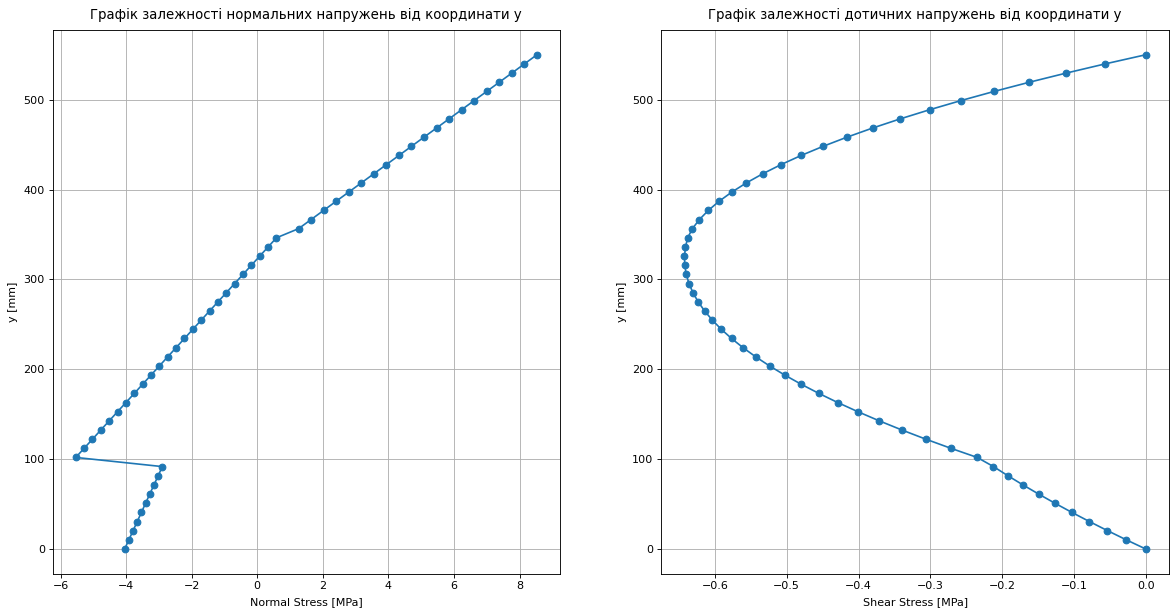

In [8]:
figure_1, (ax_1, ax_2) = plt.subplots(1, 2, figsize = (18, 9), dpi = 80)

ax_1.plot(stress_DF['Normal Stress [MPa]'], stress_DF['y [mm]'], marker = 'o')
ax_2.plot(stress_DF['Shear Stress [MPa]'], stress_DF['y [mm]'], marker = 'o')

def custom_plot(ax):
    if ax == ax_1:
        ax.set_title('Графік залежності нормальних напружень від координати y', pad = 10)
        ax.set_xlabel('Normal Stress [MPa]', labelpad = 5)
    else:
        ax.set_title('Графік залежності дотичних напружень від координати y', pad = 10)
        ax.set_xlabel('Shear Stress [MPa]', labelpad = 5)

    ax.set_ylabel('y [mm]', labelpad = 5)
    ax.set_xlabel('Normal Stress [MPa]' if ax == ax_1 else 'Shear Stress [MPa]', labelpad = 5)
    ax.grid()

custom_plot(ax_1)
custom_plot(ax_2)

plt.show()

Таблиця напружень `stress_DF` для перших 5 точок буде виглядати так:

In [9]:
stress_DF.head()

,y [mm],Normal Stress [MPa],Shear Stress [MPa]
0,0.000000,-4.043566,-0.000000
1,10.185185,-3.916027,-0.027023
2,20.370370,-3.788488,-0.053181
3,30.555556,-3.660949,-0.078472
4,40.740741,-3.533410,-0.102897


Нейтральна вісь перебуває від верхньої кромки на відстані, рівній

In [10]:
y_0 = round(S_2 / (2 * S_1), 2)

print("y_0 =", y_0, '[mm]')

y_0 = 322.92 [mm]


Жорсткість визначається за формулою

In [11]:
D = (h * S) / (12 * S_1)

Рівняння зігнутої вісі визначається як

In [12]:
def deformation(x):
    return (P / (6 * D)) * ((x**3) - 3 * (l**2) * x + 2 * (l**3)) - (M / (2 * D)) * (x - l)**2

Знаходимо деформацію згину вздовж координти х та зберігаємо дані таблиці `deformation_DF`

In [13]:
deformation_list = []
x_coord_list = []
    
for i in range(0, 49):
    x_coord = i * l / 48
    
    deformation_list.append(deformation(x_coord))
    x_coord_list.append(x_coord)
    
deformation_DF = pd.DataFrame({'x [mm]': x_coord_list, 'Deformation [mm]': deformation_list})

Зображуємо графік залежності деформації балки відносно х

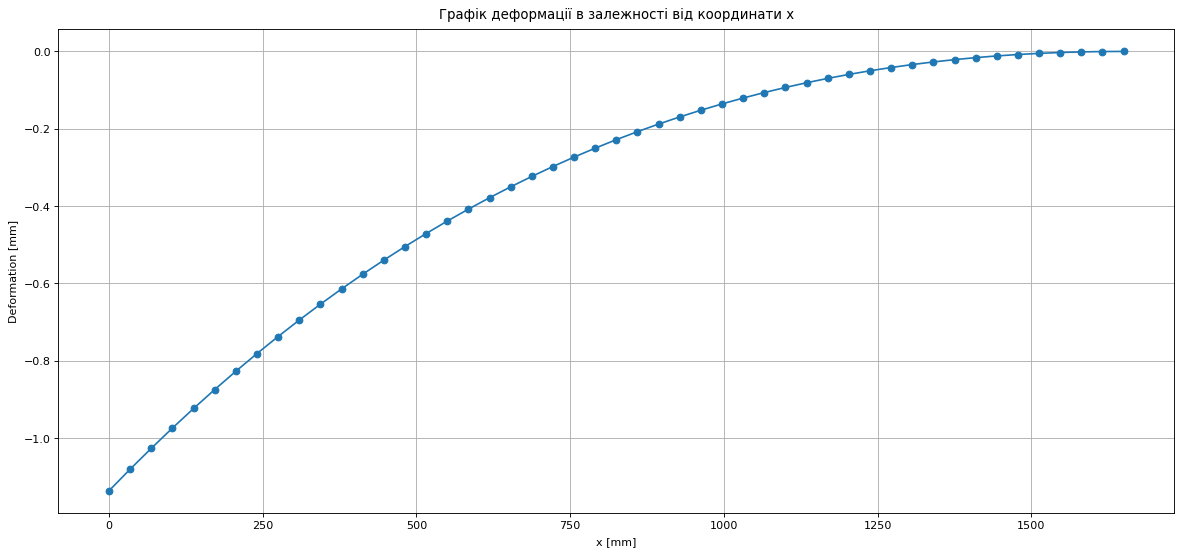

In [14]:
figure_2, ax = plt.subplots(figsize = (18, 8), dpi = 80)

ax.plot(deformation_DF['x [mm]'], deformation_DF['Deformation [mm]'], marker = 'o')
ax.set_title('Графік деформації в залежності від координати х', pad = 10)
ax.set_xlabel('x [mm]', labelpad = 5)
ax.set_ylabel('Deformation [mm]', labelpad = 5)
ax.grid()

plt.show()

##### Таблиця `deformation_DF` для перших 5 точок має вигляд

In [15]:
deformation_DF.head()

,x [mm],Deformation [mm]
0,0.000,-1.136373
1,34.375,-1.080600
2,68.750,-1.026564
3,103.125,-0.974242
4,137.500,-0.923608


## Частина 2 Чисельний метод

Для розв'язання задачі чисельним методом скористаємося програмою ANSYS 2020 R1

Будуємо геометричну модель багатошарової балки з робиттям сітки на СЕ, 50 [мм]

<img src="mesh.png" width="800">
<em>Рис. 2 Гемотрична модель з СЕ</em>

Прикладаємо силу і момент, а також закріплюємо балку як зображено на Рис. 1

<img src="setup.png" width="800">

Після розрахунку отримуємо наступні результати:

1. Нормальні нарпуження

<img src="normal.png" width="800">
<em>Рис. 3 Розподіл нормальних напружень</em>

2. Дотичні напруження

<img src="shear.png" width="800">
<em>Рис. 4 Розподіл дотичних напружень</em>

3. Деформації згину балки

<img src="deformation.png" width="800">
<em>Рис. 5 Деформаціїї згину</em>

Будуємо графіки напружень в точці `x = 1000 [mm]`, а також графік зігнутої вісі вздовж координати `x`

1. Графік нормальних напружень

<img src="normal2.png" width="800">
<em>Рис. 6 Графік нормальних напружень в залежності від y</em>

2. Графік дотичних напружень

<img src="shear2.png" width="800">
<em>Рис. 7 Графік дотичних напружень в залежності від y</em>

3. Графік зігнутої вісі

<img src="deformation2.png" width="800">
<em>Рис. 8 Графік зігнутої вісі в залежності від х</em>

## Частина 3 Порівняння результатів

Експортуємо отримані дані напружень з ANSYS та імпортуємо їх до таблиці `stress_DF`

In [16]:
normal_stress_txt = pd.read_csv("normal.txt", sep = "\t")
shear_stress_txt = pd.read_csv("shear.txt", sep = "\t")
normal_stress_list = normal_stress_txt['Value [MPa]'].tolist()
shear_stress_list = shear_stress_txt['Value [MPa]'].tolist()


for i in range(0, len(stress_DF), 1):
    normal_stress_list[i] = normal_stress_list[i].replace(',', '.')
    shear_stress_list[i] = shear_stress_list[i].replace(',', '.')
    
stress_DF['Normal Stress (CAE) [MPa]'] = pd.DataFrame(normal_stress_list, dtype = 'float')
stress_DF['Shear Stress (CAE) [MPa]'] = pd.DataFrame(shear_stress_list, dtype = 'float')

Розраховуємо відносні похибки отриманих результатів і заносимо їх до тієї самої таблиці

In [17]:
accuracy_normal_list = []
accuracy_shear_list = []

for i in range(0, len(stress_DF)):
    normal_stress = pd.to_numeric(stress_DF['Normal Stress [MPa]'][i])
    normal_stress_cae = pd.to_numeric(stress_DF['Normal Stress (CAE) [MPa]'][i])
    shear_stress = pd.to_numeric(stress_DF['Shear Stress [MPa]'][i])
    shear_stress_cae = pd.to_numeric(stress_DF['Shear Stress (CAE) [MPa]'][i])
    
    accuracy_normal = round((((normal_stress - normal_stress_cae) / normal_stress) * 100), 2) if normal_stress != 0 else 0
    accuracy_shear = round((((shear_stress - shear_stress_cae) / shear_stress) * 100), 2) if shear_stress != 0 else 0
    
    accuracy_normal_list.append(accuracy_normal)
    accuracy_shear_list.append(accuracy_shear)
    
stress_DF['Accuracy Normal Stress [%]'] = accuracy_normal_list
stress_DF['Accuracy Shear Stress [%]'] = accuracy_shear_list

Максимальна похибка нормальних та дотичних напружень буде:

In [18]:
print("Для нормальних напружень максимальна похибка становить", stress_DF['Accuracy Normal Stress [%]'].max(), "%")
print("Для дотичних напружень максимальна похибка становить", stress_DF['Accuracy Shear Stress [%]'].max(), "%")

Для нормальних напружень максимальна похибка становить 3.57 %
Для дотичних напружень максимальна похибка становить 1.84 %


Будуємо порівняльний графік нормальних та дотичних напружень двох методів

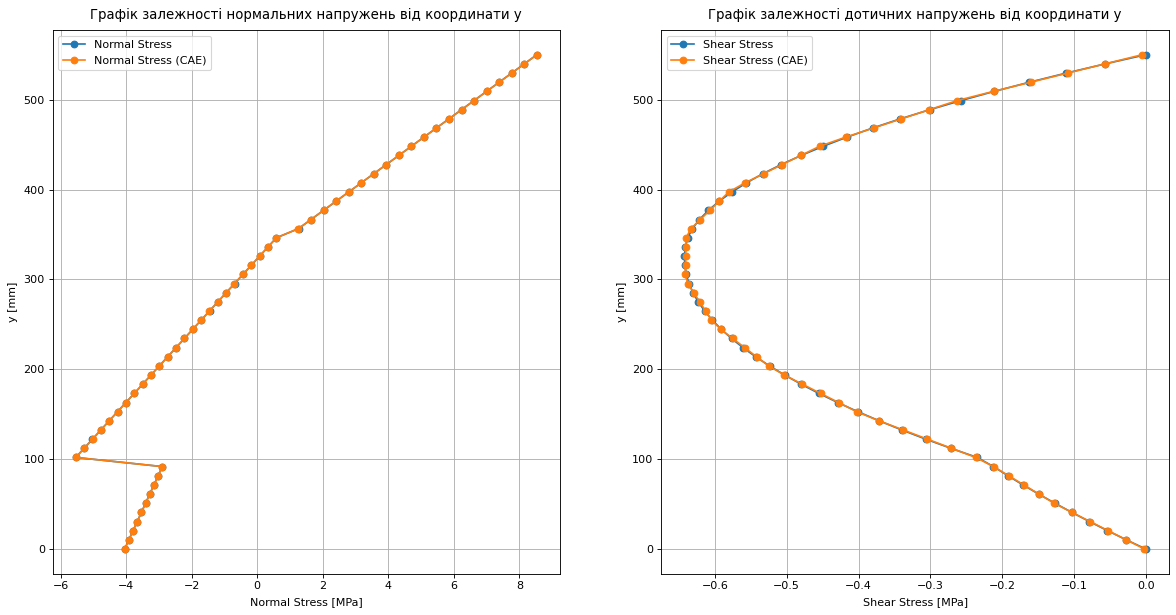

In [19]:
figure_3, (ax_1, ax_2) = plt.subplots(1, 2, figsize = (18, 9), dpi = 80)

ax_1.plot(stress_DF['Normal Stress [MPa]'], stress_DF['y [mm]'], marker = 'o', label = 'Normal Stress')
ax_1.plot(stress_DF['Normal Stress (CAE) [MPa]'], stress_DF['y [mm]'], marker = 'o', label = 'Normal Stress (CAE)')
ax_2.plot(stress_DF['Shear Stress [MPa]'], stress_DF['y [mm]'], marker = 'o', label = 'Shear Stress')
ax_2.plot(stress_DF['Shear Stress (CAE) [MPa]'], stress_DF['y [mm]'], marker = 'o', label = 'Shear Stress (CAE)')

def custom_plot(ax):
    if ax == ax_1:
        ax.set_title('Графік залежності нормальних напружень від координати y', pad = 10)
        ax.set_xlabel('Normal Stress [MPa]', labelpad = 5)
        ax.legend()
    else:
        ax.set_title('Графік залежності дотичних напружень від координати y', pad = 10)
        ax.set_xlabel('Shear Stress [MPa]', labelpad = 5)
        ax.legend()

    ax.set_ylabel('y [mm]', labelpad = 5)
    ax.set_xlabel('Normal Stress [MPa]' if ax == ax_1 else 'Shear Stress [MPa]', labelpad = 5)
    ax.grid()

custom_plot(ax_1)
custom_plot(ax_2)

plt.show()

Кінцевий варіант таблиці `stress_DF` для перших 5 точок матиме вигляд

In [20]:
stress_DF.head()

,y [mm],Normal Stress [MPa],Shear Stress [MPa],Normal Stress (CAE) [MPa],Shear Stress (CAE) [MPa],Accuracy Normal Stress [%],Accuracy Shear Stress [%]
0,0.000000,-4.043566,-0.000000,-4.0401,-0.001734,0.09,0.00
1,10.185185,-3.916027,-0.027023,-3.9127,-0.027006,0.08,0.06
2,20.370370,-3.788488,-0.053181,-3.7854,-0.052278,0.08,1.70
3,30.555556,-3.660949,-0.078472,-3.6580,-0.077550,0.08,1.17
4,40.740741,-3.533410,-0.102897,-3.5306,-0.102820,0.08,0.08


Експортуємо дані отриманих даформацій та імпортуємо їх до таблиці `deformation_DF`

In [21]:
deformation_txt = pd.read_csv("deformation.txt", sep = "\t")
deformation_list_cae = deformation_txt['Value [mm]'].tolist()

for i in range(0, len(deformation_DF), 1):
    deformation_list_cae[i] = float(deformation_list_cae[i].replace(',', '.'))
    
deformation_DF['Deformation (CAE) [mm]'] = pd.DataFrame(deformation_list_cae, dtype = 'float')

Розраховуємо відносну похибку та заносимо її до тієї самої таблиці

In [22]:
accuracy_deformation_list = []

for i in range(0, len(deformation_DF)):
    deformation = pd.to_numeric(deformation_DF['Deformation [mm]'][i]) * 100
    deformation_cae = pd.to_numeric(deformation_DF['Deformation (CAE) [mm]'][i]) * 100
    
    accuracy_deformation = round(((deformation - deformation_cae) / deformation) * 100, 2) if deformation != 0 else 0
    
    accuracy_deformation_list.append(accuracy_deformation)
    
deformation_DF['Accuracy Deformation [%]'] = accuracy_deformation_list

Максимальна похибка деформацій буде:

In [23]:
print(deformation_DF['Accuracy Deformation [%]'].max(), "%")

16.24 %


Зображуємо порівняльний графік зігнутої вісі отриманої двома методами

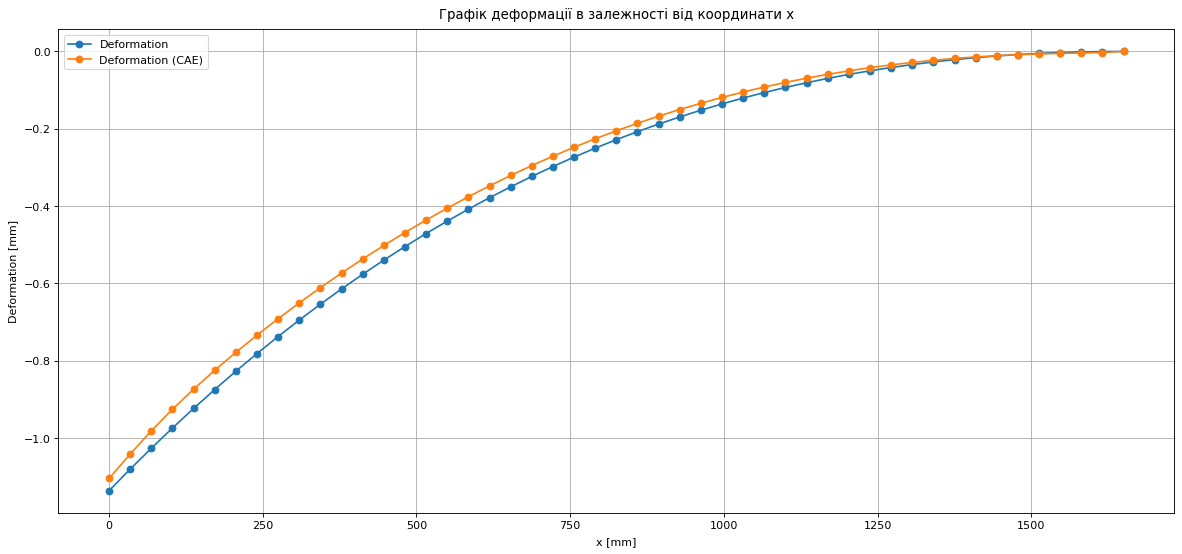

In [24]:
figure_3, ax = plt.subplots(figsize = (18, 8), dpi = 80)

ax.plot(deformation_DF['x [mm]'], deformation_DF['Deformation [mm]'], marker = 'o', label = 'Deformation')
ax.plot(deformation_DF['x [mm]'], deformation_DF['Deformation (CAE) [mm]'], marker = 'o', label = 'Deformation (CAE)')

ax.set_title('Графік деформації в залежності від координати х', pad = 10)
ax.set_xlabel('x [mm]', labelpad = 5)
ax.set_ylabel('Deformation [mm]', labelpad = 5)
ax.legend()
ax.grid()

plt.show()

Таблиця `deformation_DF` для перших 5 точок має вигляд:

In [25]:
deformation_DF.head()

,x [mm],Deformation [mm],Deformation (CAE) [mm],Accuracy Deformation [%]
0,0.000,-1.136373,-1.10470,2.79
1,34.375,-1.080600,-1.04160,3.61
2,68.750,-1.026564,-0.98144,4.40
3,103.125,-0.974242,-0.92584,4.97
4,137.500,-0.923608,-0.87377,5.40


## Висновок

Отже, як видно з порівняння двох методів, результат напружень аналітичного та чисельного розрахунків є збіжним, а максимальна відносна похибка для нормальних напружень становить 3.57 % і для дотичних напружень 1.84 %. Переміщення розраховані чисельним методом дещо відрізняються з маскимальною відносною похибкою, яка становить 16.24 %. Похибка переміщень може бути пояснена використанням тривимірних скінченних елементів та дискретизації СЕ моделі.